# Basic Neural Network Implementation

In this lab, you will create and train a replica of the DeepSea model for DNA sequence prediction that encorperates random events like transcription factor binding.

## Background

- [DeepSea](https://www.nature.com/articles/nmeth.3547) is a convolutional neural network. The paper helps explain some of the background on the DeepSea model.
- [Tensorflow basic tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)
- Stanford course notes on [convolutional neural networks](https://cs231n.github.io/convolutional-networks/)

## Basic Guidelines

1. Make a copy of this notebook and save it on your own google drive (File -> Save a copy in drive)
1. Complete your version of this notebook on Google Colab


Also, you can likely complete this lab without understanding neural networks in depth through pattern matching the code; however, I strongly encourage that you at least having a good intuition for how convolutional neural nets work.



## Imports

To build the model, we will use Tensorflow, and specifically it's Keras API.

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## Load data

In [ ]:
!wget https://github.com/bioe131/lab9/raw/main/deepsea10k.tar.gz
!tar -xf "deepsea10k.tar.gz"

--2022-11-13 21:47:29--  https://github.com/bioe131/lab9/raw/main/deepsea10k.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bioe131/lab9/main/deepsea10k.tar.gz [following]
--2022-11-13 21:47:29--  https://raw.githubusercontent.com/bioe131/lab9/main/deepsea10k.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6036702 (5.8M) [application/octet-stream]
Saving to: ‘deepsea10k.tar.gz’

deepsea10k.tar.gz   100%[===================>]   5.76M  --.-KB/s    in 0.02s   

2022-11-13 21:47:30 (374 MB/s) - ‘deepsea10k.tar.gz’ saved [6036702/6036702]



In [ ]:
# full dataset if you're curious, very large file!
# !wget http://deepsea.princeton.edu/media/code/deepsea_train_bundle.v0.9.tar.gz

In [ ]:
def load_data(path):
    '''
    Loads DeepSEA HDF5 data and reorders the axes.
    
    Returns 
    -------
    (sequences, labels), where the first axis is sample #.
    '''
    with h5py.File(path, 'r') as f:
        sequences = f['trainxdata'][:,:,:]
        labels = f['traindata'][:, :]
    return np.rollaxis(sequences, 2).astype(np.float16), np.rollaxis(labels, 1).astype(np.float16)

## Part 1


In [ ]:
sequences, labels = load_data("train10k.mat")

Here we split the data into train and test sets. In machine learning, it's important to hold data out to understand the generalization capability of the model. For this lab we are using scikit-learn for these basic preprocessing steps.

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.25)

### 1.1 What is the shape of the data and what does each dimension represent?

This is a 4 dimensional array, which is why it appears as a matrix here with a length of 4 different values. Each dimension here accounts for a base in the sequence. The y values that thus define the shape are then based on the labels that define each class of sequence.

In [ ]:
# code here
print(X_train.shape)

(7500, 1000, 4)


Note that of the 919 different labels, they are split into types:

1. DNase I-hypersensitive sites `range(0, 125)`
2. Transcription factors `range(125, 125 + 690)`
3. Histone Marks `range(125 + 690, 125 + 690 + 104)`

## Part 2

### 2.1 

**Implement and train a basic fully connected network (multilayer perceptron) by completing the SimpleDeepSea class with the following architecture:**

Model Architecture: 
1. Dense layer (2000 units, ‘relu’ activation)
2. BatchNormalization
3. Dropout layer (dropout rate 0.3)
4. Dense layer (2000 units, ‘relu’ activation)
5. BatchNormalization
6. Dropout layer (dropout rate 0.3)
7. Dense layer (919 units, ‘sigmoid’ activation)


You can complete the `SimpleDeepSEA` class, which is partially implemented below. You are encouraged to read the tf.keras docs. For example, dense layers are [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

**Starter example**

-dont need to flatten every time

-basically what we'll be doing is calling each layer as an equation of the previous layer

-to call them, you set them equal to temp which is just taking in the prevous layer and calling the next one

declare new variable: self.batchnormal_1 = keras.layers.BatchNormalization()

dropout layer: self.dropout_1 = keras.layers.Dropout(rate = 0.3)

self.Dense_2 = keras.layers.Dense(units=2000, activation='relu',)



In [ ]:
class SimpleDeepSEA(keras.Model):
    def __init__(self):
        super(SimpleDeepSEA, self).__init__()

        self.flatten = keras.layers.Flatten()
        self.dense_1 = keras.layers.Dense(
            units=2000,
            activation='relu',
        )

        # IMPLEMENT LAYERS HERE
        self.batchnormal_1 = keras.layers.BatchNormalization()
        self.dropout_1 = keras.layers.Dropout(rate = 0.3)
        self.Dense_2 = keras.layers.Dense(units=2000, activation='relu',)
        self.batchnormal_2 = keras.layers.BatchNormalization()
        self.dropout_2 = keras.layers.Dropout(rate = 0.3)
        self.Dense_3 = keras.layers.Dense(units=919, activation='sigmoid',)
        


    def call(self, inputs, **kwargs):
        """
        Forward propagation of DeepSEA model.

        Parameters
        ----------
        inputs
            shape = (batch_size, length, c)
        kwargs

        Returns
        -------
        shape = (batch_size, 919)
        """

        temp = self.flatten(inputs)

        temp = self.dense_1(temp)

        # CALL LAYERS HERE
        temp = self.batchnormal_1(temp)
        temp = self.dropout_1(temp)
        temp = self.Dense_2(temp)
        temp = self.batchnormal_2(temp)
        temp = self.dropout_2(temp)
        temp = self.Dense_3(temp)
        output = temp
        return output

In [ ]:
# Build the model.
model = SimpleDeepSEA()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy())
model.build(input_shape = (None, 1000, 4))
model.summary()

Model: "simple_deep_sea"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  8002000   
                                                                 
 batch_normalization (BatchN  multiple                 8000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  4002000   
                                                                 
 batch_normalization_1 (Batc  multiple                 8000      
 hNormalization)                                   

In [ ]:
# Training the model.
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    epochs=75,
)

Epoch 1/75
211/211 [==============================] - 7s 11ms/step - loss: 0.3289 - val_loss: 0.1440
Epoch 2/75
211/211 [==============================] - 2s 10ms/step - loss: 0.1106 - val_loss: 0.1085
Epoch 3/75
211/211 [==============================] - 2s 10ms/step - loss: 0.1031 - val_loss: 0.1111
Epoch 4/75
211/211 [==============================] - 2s 9ms/step - loss: 0.0961 - val_loss: 0.1184
Epoch 5/75
211/211 [==============================] - 2s 10ms/step - loss: 0.0883 - val_loss: 0.1189
Epoch 6/75
211/211 [==============================] - 1s 6ms/step - loss: 0.0848 - val_loss: 0.1177
Epoch 7/75
211/211 [==============================] - 1s 6ms/step - loss: 0.0777 - val_loss: 0.1373
Epoch 8/75
211/211 [==============================] - 1s 6ms/step - loss: 0.0722 - val_loss: 0.1247
Epoch 9/75
211/211 [==============================] - 1s 6ms/step - loss: 0.0683 - val_loss: 0.1281
Epoch 10/75
211/211 [==============================] - 1s 6ms/step - loss: 0.0642 - val_loss: 0.

In [ ]:
simple_predictions = model.predict(X_test) # shape = (455024, 919)

79/79 [==============================] - 0s 2ms/step


In [ ]:
simple_predictions.shape

(2500, 919)

## Part 3

**Implement DeepSea by completing the DeepSea class. Below is the model architecture, which can also be found in the Supplementary Note of the DeepSea manuscript.**

Model Architecture: 
1. Convolution layer ( 320 kernels. Window size: 8. Step size: 1. ) 
2. Pooling layer ( Window size: 4. Step size: 4. ) 
3. Convolution layer ( 480 kernels. Window size: 8. Step size: 1. ) 
4. Pooling layer ( Window size: 4. Step size: 4. ) 
5. Convolution layer ( 960 kernels. Window size: 8. Step size: 1. ) 
6. Fully connected layer ( 925 neurons ) 
7. Sigmoid output layer 

Regularization Parameters: 

- Dropout proportion (proportion of outputs randomly set to 0): 
- Layer 2: 20% 
- Layer 4: 20% 
- Layer 5: 50% 
- All other layers: 0%

Also, 
- L2 regularization (5e-07)
- L1 sparsity (1e-08)
- Max kernel norm (0.9)

You can complete the `DeepSEA` class, which is partially implemented below.


In [ ]:
class DeepSEA(keras.Model):
    def __init__(self):
        super(DeepSEA, self).__init__()
        self.conv_1 = keras.layers.Conv1D(
            filters=320,
            kernel_size=8,
            strides=1,
            use_bias=False,
            padding='SAME',
            activation='relu',
            kernel_regularizer=tf.keras.regularizers.l2(5e-07),
            kernel_constraint=tf.keras.constraints.MaxNorm(0.9))
        
        # IMPLEMENT LAYERS HERE
        self.flatten = keras.layers.Flatten()
        self.pool_1 = keras.layers.MaxPooling1D(pool_size= 4, strides= 4, 
                                                padding="valid", data_format="channels_last")
        self.dropout_1 = keras.layers.Dropout(rate = 0.2)

        self.conv_2 = keras.layers.Conv1D(filters=480, kernel_size=8, strides=1,
                                          use_bias=False, padding='SAME', activation='relu',
                                          kernel_regularizer=tf.keras.regularizers.l2(5e-07),
                                          kernel_constraint=tf.keras.constraints.MaxNorm(0.9))
        self.pool_2 = keras.layers.MaxPooling1D(pool_size= 4, strides= 4, 
                                                padding="valid", data_format="channels_last")
        self.dropout_2 = keras.layers.Dropout(rate = 0.2)

        self.conv_3 = keras.layers.Conv1D(filters=960, kernel_size=8, strides=1,
                                          use_bias=False, padding='SAME', activation='relu',
                                          kernel_regularizer=tf.keras.regularizers.l2(5e-07),
                                          kernel_constraint=tf.keras.constraints.MaxNorm(0.9))
        self.dropout_3 = keras.layers.Dropout(rate = 0.5)
        self.dense_1 = keras.layers.Dense(units=925, kernel_regularizer=tf.keras.regularizers.l1(1e-08), activation='relu',)
        self.dense_2 = keras.layers.Dense(units=919, activation='sigmoid',)


    def call(self, inputs, **kwargs):
        """
        Forward propagation of DeepSEA model.

        Parameters
        ----------
        inputs
            shape = (batch_size, length, c)
        kwargs

        Returns
        -------
        shape = (batch_size, 919)
        """
        # Convolution Layer 1 -> converts groups of 320 into single output
        temp = self.conv_1(inputs)

        # Pooling Layer 1 -> summarises the features present in a region of the feature map generated by a convolution layer
        temp = self.pool_1(temp)

        # Dropout Layer 1 -> randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 
        temp = self.dropout_1(temp)

        # Convolution Layer 2
        temp = self.conv_2(temp)

        # Pooling Layer 2
        temp = self.pool_2(temp)

        # Dropout Layer 2
        temp = self.dropout_2(temp)

        # Convolution Layer 3
        temp = self.conv_3(temp)

        # Dropout Layer 3
        temp = self.dropout_3(temp)

        # Flatten Layer 1
        temp = self.flatten(temp)

        # Fully Connection Layer 1 -> Dense implements the operation: output = activation(dot(input, kernel) + bias)
        temp = self.dense_1(temp)

        # Fully Connection Layer 2
        output = self.dense_2(temp)

        return output

### 3.1 What is the shape of the outputted tensor of each layer?


For this question, answer by adding comments above each layer call in the `call` method. Please also describe the method you used to answer this question below.

[ANSWER HERE]

in code block above, just add comments before you call each layer. Put your own comments above that that will show what the shape of the output will be.

In [ ]:
# Build the model.
model = DeepSEA()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy())
model.build(input_shape = (None, 1000, 4))
model.summary()

Model: "deep_sea"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             multiple                  10240     
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 max_pooling1d (MaxPooling1D  multiple                 0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 conv1d_1 (Conv1D)           multiple                  1228800   
                                                                 
 max_pooling1d_1 (MaxPooling  multiple                 0         
 1D)                                                      

In [ ]:
# Training the model.
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    epochs=15,
)

Epoch 1/15
211/211 [==============================] - 20s 62ms/step - loss: 0.1153 - val_loss: 0.0995
Epoch 2/15
211/211 [==============================] - 12s 59ms/step - loss: 0.1041 - val_loss: 0.1007
Epoch 3/15
211/211 [==============================] - 12s 59ms/step - loss: 0.1003 - val_loss: 0.0944
Epoch 4/15
211/211 [==============================] - 12s 59ms/step - loss: 0.0987 - val_loss: 0.0942
Epoch 5/15
211/211 [==============================] - 13s 59ms/step - loss: 0.0965 - val_loss: 0.0935
Epoch 6/15
211/211 [==============================] - 12s 58ms/step - loss: 0.0955 - val_loss: 0.0918
Epoch 7/15
211/211 [==============================] - 12s 59ms/step - loss: 0.0919 - val_loss: 0.0904
Epoch 8/15
211/211 [==============================] - 13s 60ms/step - loss: 0.0892 - val_loss: 0.0914
Epoch 9/15
211/211 [==============================] - 12s 59ms/step - loss: 0.0849 - val_loss: 0.0918
Epoch 10/15
211/211 [==============================] - 13s 60ms/step - loss: 0.080

In [ ]:
def plot_loss_curve(train_loss, val_loss):
    """
    Plot the loss curve to monitor the fitting status.
    """
    plt.figure()
    plt.plot(train_loss, lw=1, label = 'Train Loss')
    plt.plot(val_loss, lw=1, label = 'Validation Loss')
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(loc="upper right")


 history dict:  {'loss': [0.11532435566186905, 0.10410155355930328, 0.10034085810184479, 0.09872859716415405, 0.09649598598480225, 0.09546096622943878, 0.0919184461236, 0.08922120928764343, 0.08489164710044861, 0.080330990254879, 0.07770804315805435, 0.0752260684967041, 0.07308299839496613, 0.07092593610286713, 0.07007031887769699], 'val_loss': [0.09951608628034592, 0.10073854774236679, 0.09443951398134232, 0.09420420229434967, 0.09350942820310593, 0.09175355732440948, 0.09039612114429474, 0.0914187803864479, 0.09184490144252777, 0.09424089640378952, 0.08916924148797989, 0.08971280604600906, 0.08756846934556961, 0.08657868206501007, 0.08674883842468262]}


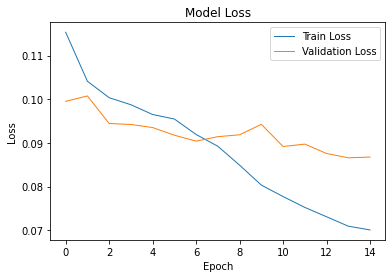

In [ ]:
# Plot the loss curve of training and validation, and save the loss value of training and validation.
print('\n history dict: ', history.history)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plot_loss_curve(train_loss, val_loss)

### 3.2 What are we looking for when inspecting a loss curve?

[Answer here]
If the layers are working the way they are intended, the loss should get sequentially lower as it runs longer. This would reflect the neural network assigning proper weights to each node and maximixing the output. This can be seen with the training line. This is how the model is doing after training with a subsection of the dataset.

The validation dataset is different from the test dataset that is also held back from the training of the model, but is used later to test the validity of the final model. This explains why having a validation loss that is mostly above the training loss would be an indication of overfitting.

### Get predictions

In [ ]:
predictions = model.predict(X_test) # shape = (2500, 919)

79/79 [==============================] - 1s 11ms/step


In [ ]:
predictions.shape

(2500, 919)

In [ ]:
print(len(y_test))
print(len(y_test[0]))

2500
919


## Part 4

Now we'd like to evaluate how well our classifier has performed. For that we will use something called a [receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).


### 4.1 In your own words, what is an ROC curve?

[Answer here]
An ROC curve works to determine wheteher a value is in a specific group or not. So, you have a threshold that a value must pass to be part of a group and if it does not than it will be placed in the other. These predictions are probabilities between 0 and 1. With this, you get some that fall into the wrong groups. This will provide a false positive rate and a true positive rate. The plot will then be the comparison between both.

### 4.2 Plot an ROC curve for each model (SimpleDeepSea, DeepSea) grouped by "label" class ('Transcription factors', 'DNase I-hypersensitive sites', 'Histone marks').

Please exclude "labels" for which there are fewer than 50 positives in the entire dataset.

**Hint: Search for `roc_curve` in scikit-learn**


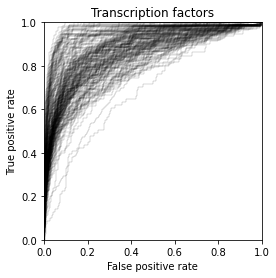

Note that of the 919 different labels, they are split into types:

1. DNase I-hypersensitive sites `range(0, 125)`
2. Transcription factors `range(125, 125 + 690)`
3. Histone Marks `range(125 + 690, 125 + 690 + 104)`

In [ ]:
print(len(predictions[0]))

919


In [ ]:
from sklearn.metrics import roc_curve
y_true = y_test.T
labela = labels.T
simpleY_score = simple_predictions.T
deepY_score = predictions.T
tpr1 = [[],[],[]]
tpr2 = [[],[],[]]
fpr1 = [[],[],[]]
fpr2 = [[],[],[]]

for i in range(len(y_true)):
  if sum(labela[i]) >= 50:
    if i < 125:
      fprs, tprs, thresholds = roc_curve(y_true[i], simpleY_score[i])
      fprd, tprd, thresholdd = roc_curve(y_true[i], deepY_score[i])
      fpr1[0].append(fprs)
      fpr2[0].append(fprd)
      tpr1[0].append(tprs)
      tpr2[0].append(tprd)
    elif i >= 125 and i < 815:
      fprs, tprs, thresholds = roc_curve(y_true[i], simpleY_score[i])
      fprd, tprd, thresholdd = roc_curve(y_true[i], deepY_score[i])
      fpr1[1].append(fprs)
      fpr2[1].append(fprd)
      tpr1[1].append(tprs)
      tpr2[1].append(tprd)
    elif i >= 815 and i <= 919:
      fprs, tprs, thresholds = roc_curve(y_true[i], simpleY_score[i])
      fprd, tprd, thresholdd = roc_curve(y_true[i], deepY_score[i])
      fpr1[2].append(fprs)
      fpr2[2].append(fprd)
      tpr1[2].append(tprs)
      tpr2[2].append(tprd)

In [ ]:
def plot_roc_curve(fpr, tpr, modelname, dataname):
  plotTitle = 'ROC Curve: %s %s' %(modelname, dataname)
  plt.figure(figsize=(7,5))
  for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i])
  plt.title(plotTitle, fontweight='bold', fontsize=14)
  plt.xlabel('False Positive Rate', fontsize=10)
  plt.ylabel('True Positive Rate', fontsize= 10)

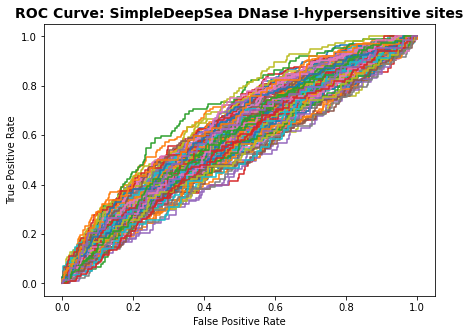

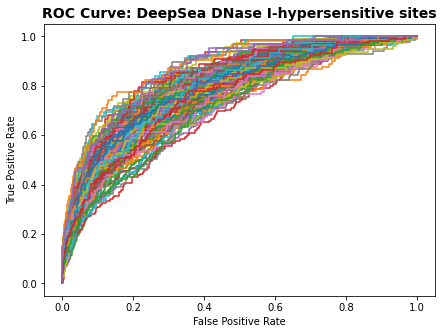

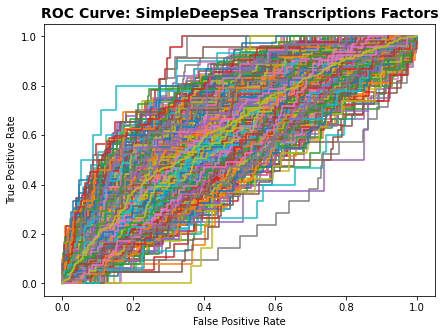

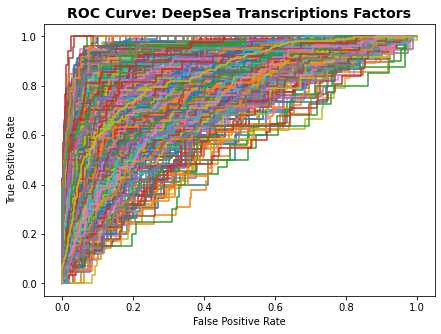

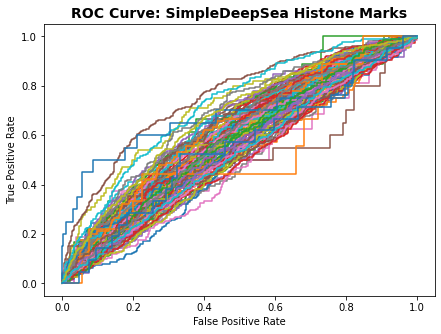

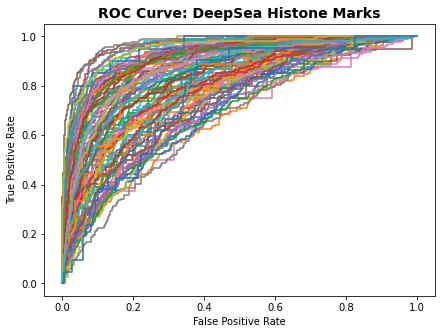

In [ ]:
plot_roc_curve(fpr1[0], tpr1[0], "SimpleDeepSea", "DNase I-hypersensitive sites")
plot_roc_curve(fpr2[0], tpr2[0], "DeepSea", "DNase I-hypersensitive sites")
plot_roc_curve(fpr1[1], tpr1[1], "SimpleDeepSea", "Transcriptions Factors")
plot_roc_curve(fpr2[1], tpr2[1], "DeepSea", "Transcriptions Factors")
plot_roc_curve(fpr1[2], tpr1[2], "SimpleDeepSea", "Histone Marks")
plot_roc_curve(fpr2[2], tpr2[2], "DeepSea", "Histone Marks")

### 4.3 Make a boxplot, grouped by model, and for each "label" class, where the values are the AUROC (area under roc).

Consider making a DataFrame and using Seaborn. This should be one single plot, points will be taken off for multiple plots.

[Example plot](https://seaborn.pydata.org/_images/grouped_boxplot.png)

Relating this example to the desired plot, smoker would be model and day would be label class.

In [ ]:
AUCsD = []
AUCsTF = []
AUCsH = []
AUCdD = []
AUCdTF = []
AUCdH = []
group = []
#auc1 is all simple, auc2 is all deep
from sklearn.metrics import roc_auc_score

for i in range(len(y_true)):
  if sum(labela[i]) >= 50:
    if i < 125:
      group.append('DNase I-Hypersensitive Sites')
      auci1 = roc_auc_score(y_true[i], simpleY_score[i])
      auci2 = roc_auc_score(y_true[i], deepY_score[i])
      AUCsD.append(auci1)
      AUCdD.append(auci2)
    elif i >= 125 and i < 815:
      group.append('Transcription Factors')
      auci1 = roc_auc_score(y_true[i], simpleY_score[i])
      auci2 = roc_auc_score(y_true[i], deepY_score[i])
      AUCsTF.append(auci1)
      AUCdTF.append(auci2)
    elif i >= 815 and i <= 919:
      group.append('Histone Marks')
      auci1 = roc_auc_score(y_true[i], simpleY_score[i])
      auci2 = roc_auc_score(y_true[i], deepY_score[i])
      AUCsH.append(auci1)
      AUCdH.append(auci2)

In [ ]:
w = 0
models = []
modeld = []
sums = len(AUCsD) + len(AUCsTF) + len(AUCsH)
while w < sums:
  modeld.append('DeepSea')
  models.append('SimpleDeepSea')
  w += 1
print(modeld)
print(len(modeld))
print(len(models))
print(sums)

['DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea', 'DeepSea'

In [ ]:
#auc1 is all simple, auc2 is all deep
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns = ['Model', 'AUC', 'Group'])
df['Model'] = models + modeld
df['AUC'] = AUCsD + AUCsTF + AUCsH + AUCdD + AUCdTF + AUCdH
df['Group'] = group + group
df

,Model,AUC,Group
0,SimpleDeepSea,0.650346,DNase I-Hypersensitive Sites
1,SimpleDeepSea,0.595607,DNase I-Hypersensitive Sites
2,SimpleDeepSea,0.625851,DNase I-Hypersensitive Sites
3,SimpleDeepSea,0.596292,DNase I-Hypersensitive Sites
4,SimpleDeepSea,0.599089,DNase I-Hypersensitive Sites
...,...,...,...
1385,DeepSea,0.876643,Histone Marks
1386,DeepSea,0.924635,Histone Marks
1387,DeepSea,0.950674,Histone Marks
1388,DeepSea,0.854879,Histone Marks


Text(0.5, 1.0, 'Area Under The Curve Distributions')

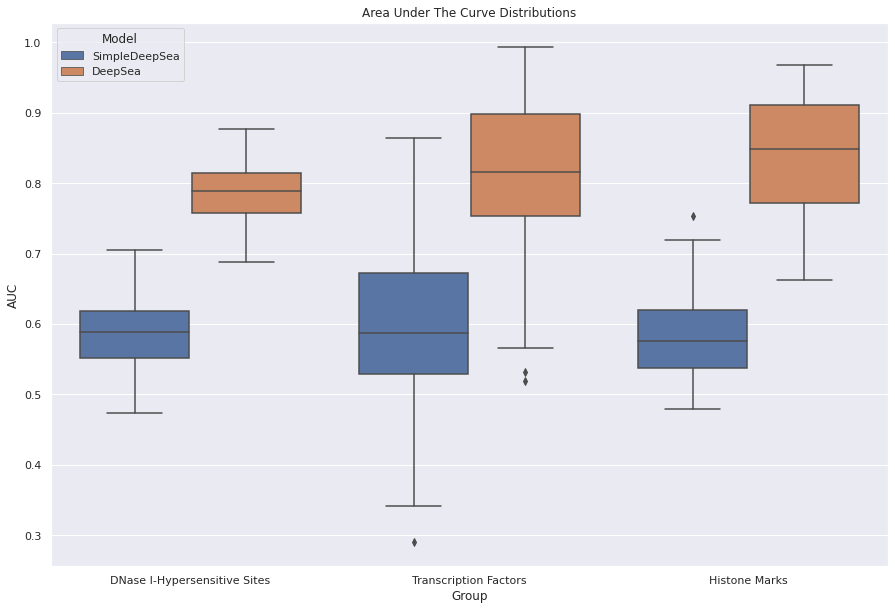

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x = 'Group', y='AUC', data = df, hue = "Model")
plt.title("Area Under The Curve Distributions")

### 4.4 Write a paragraph commenting on the performance of the models for given "label" classes.

It appears that the SimpleDeepSea model did just about the same discerning between the DNase I-Hypersensitive Sites and Histone Marks, but did marginally better with the Transcription Factors Group. As for the DeepSea model, there were very small values for DNase I-Hypersensitive Sites, more for Histone Marks, and the most for Transcription Factors. Both of the neural networks appeared to get the most values when examining the Transcription Factor datasets.